Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Reading the Data 

In [2]:
df= pd.read_csv("car data.csv")

Exploring Data

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(2)

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop(columns=['Owner'])

Cleaning and Visualizing the Data Column by Column

Cleaning and Visualizing Car Name Column

In [11]:
df['Car_Name']

0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 299, dtype: object

In [12]:
df['Car_Name'].value_counts().head(10)

Car_Name
city                         26
corolla altis                16
verna                        14
brio                         10
fortuner                     10
ciaz                          9
i20                           9
innova                        9
grand i10                     8
Royal Enfield Classic 350     7
Name: count, dtype: int64

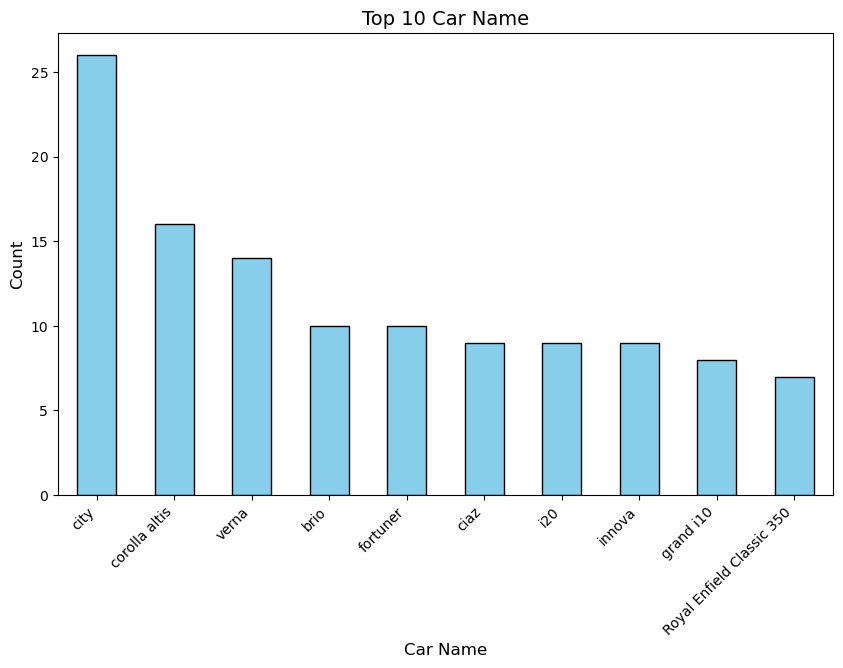

In [13]:
Car_Name_counts = df["Car_Name"].value_counts().head(10)

plt.figure(figsize=(10,6))
Car_Name_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 Car Name", fontsize=14)
plt.xlabel("Car Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Cleaning and Visualizing Year Column

In [14]:
df['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 299, dtype: int64

In [15]:
df['Year'].value_counts().head(10)

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
Name: count, dtype: int64

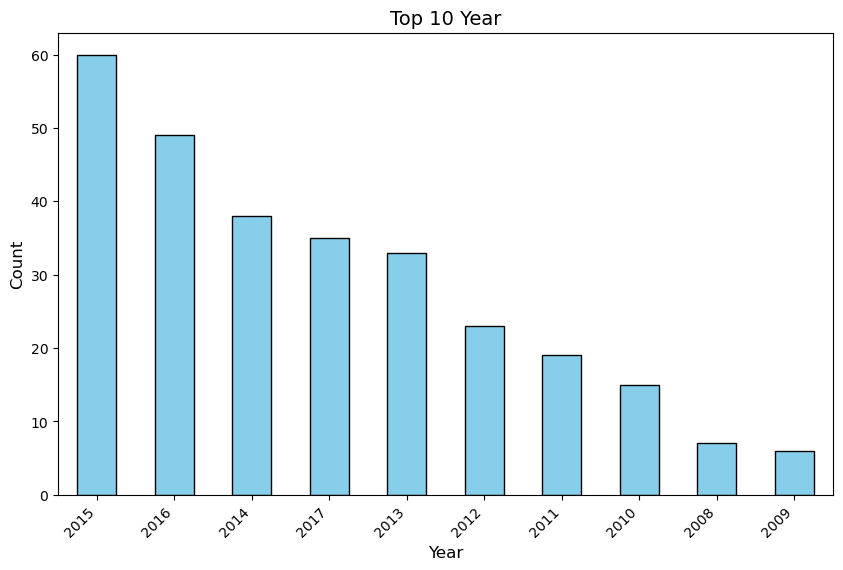

In [16]:
Year_counts = df["Year"].value_counts().head(10)

plt.figure(figsize=(10,6))
Year_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

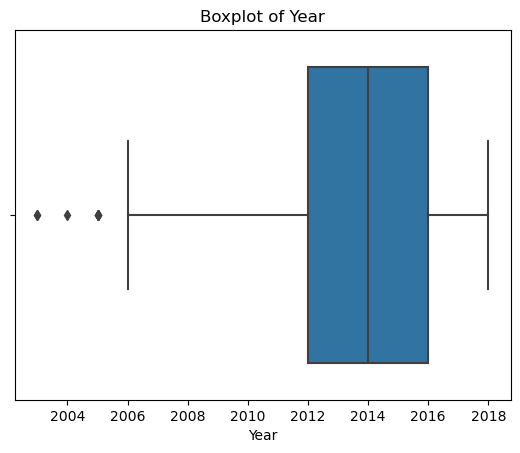

In [17]:
sns.boxplot(x=df['Year'])
plt.title("Boxplot of Year")
plt.show()

In [18]:
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Year'] >= lower_bound) &
 (df['Year'] <= upper_bound)]

In [19]:
df['Year'] = df['Year'].clip(lower=lower_bound,
                            upper=upper_bound)

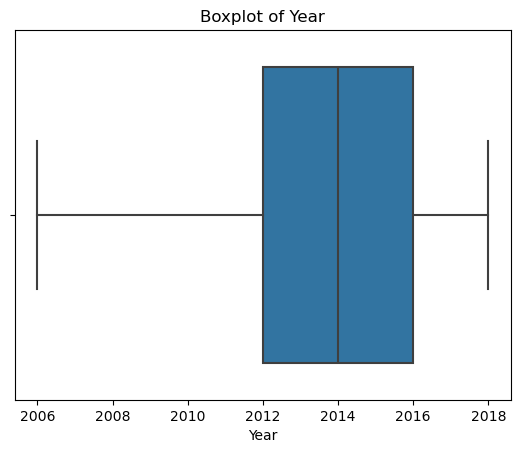

In [20]:
sns.boxplot(x=df['Year'])
plt.title("Boxplot of Year")
plt.show()

Cleaning and Visualizing Selling Price Column

In [21]:
df['Selling_Price']

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [22]:
df['Selling_Price'].value_counts().head(10)

Selling_Price
0.45    8
0.60    8
4.50    7
5.25    7
4.75    6
0.20    6
5.50    5
4.00    5
1.05    5
0.25    5
Name: count, dtype: int64

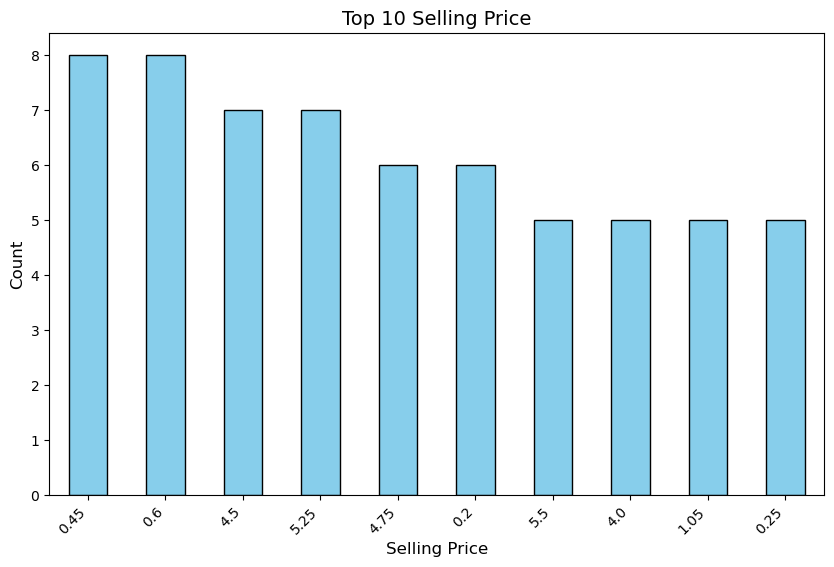

In [23]:
Selling_Price_counts = df["Selling_Price"].value_counts().head(10)

plt.figure(figsize=(10,6))
Selling_Price_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 Selling Price", fontsize=14)
plt.xlabel("Selling Price", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

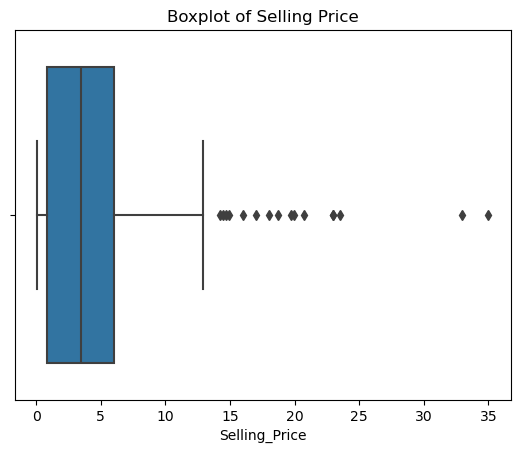

In [24]:
sns.boxplot(x=df['Selling_Price'])
plt.title("Boxplot of Selling Price")
plt.show()

In [25]:
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Selling_Price'] >= lower_bound) &
 (df['Selling_Price'] <= upper_bound)]

In [26]:
df['Selling_Price'] = df['Selling_Price'].clip(lower=lower_bound,
                                              upper=upper_bound)

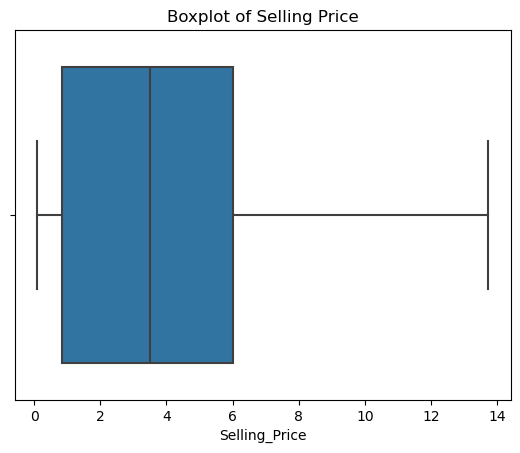

In [27]:
sns.boxplot(x=df['Selling_Price'])
plt.title("Boxplot of Selling Price")
plt.show()

Cleaning and Visualizing Present Price Column

In [28]:
df['Present_Price']

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 299, dtype: float64

In [29]:
df['Present_Price'].value_counts().head(10)

Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
4.43      6
0.51      6
0.95      6
18.61     5
0.57      5
6.79      5
Name: count, dtype: int64

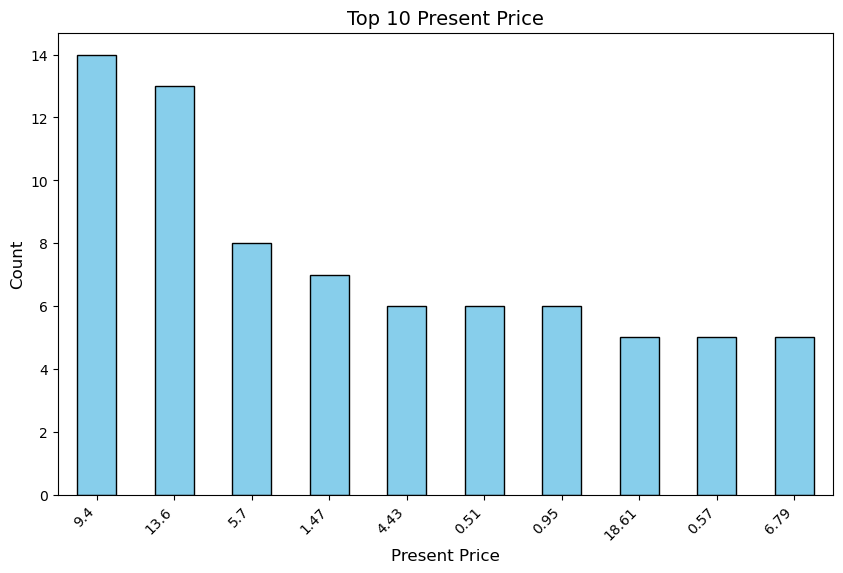

In [30]:
Present_Price_counts = df["Present_Price"].value_counts().head(10)

plt.figure(figsize=(10,6))
Present_Price_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 Present Price", fontsize=14)
plt.xlabel("Present Price", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

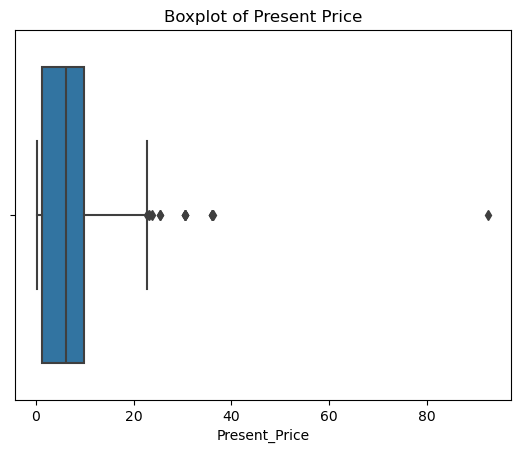

In [31]:
sns.boxplot(x=df['Present_Price'])
plt.title("Boxplot of Present Price")
plt.show()

In [32]:
Q1 = df['Present_Price'].quantile(0.25)
Q3 = df['Present_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Present_Price'] >= lower_bound) &
 (df['Present_Price'] <= upper_bound)]

In [33]:
df['Present_Price'] = df['Present_Price'].clip(lower=lower_bound,
                                              upper=upper_bound)

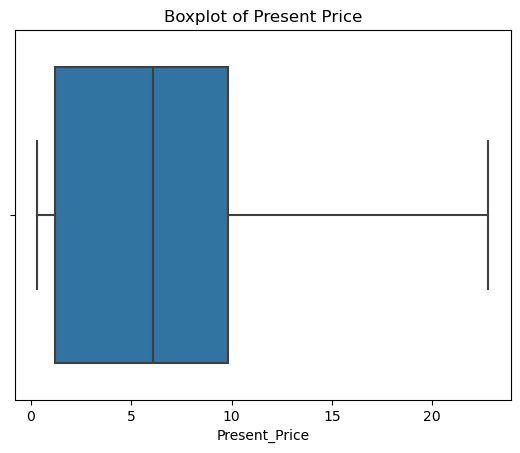

In [34]:
sns.boxplot(x=df['Present_Price'])
plt.title("Boxplot of Present Price")
plt.show()

Cleaning and Visualizing Driven kms Column

In [35]:
df['Driven_kms']

0      27000
1      43000
2       6900
3       5200
4      42450
       ...  
296    33988
297    60000
298    87934
299     9000
300     5464
Name: Driven_kms, Length: 299, dtype: int64

In [36]:
df['Driven_kms'].value_counts().head(10)

Driven_kms
15000    9
45000    9
50000    5
25000    5
35000    5
40000    4
60000    4
24000    4
19000    4
6000     4
Name: count, dtype: int64

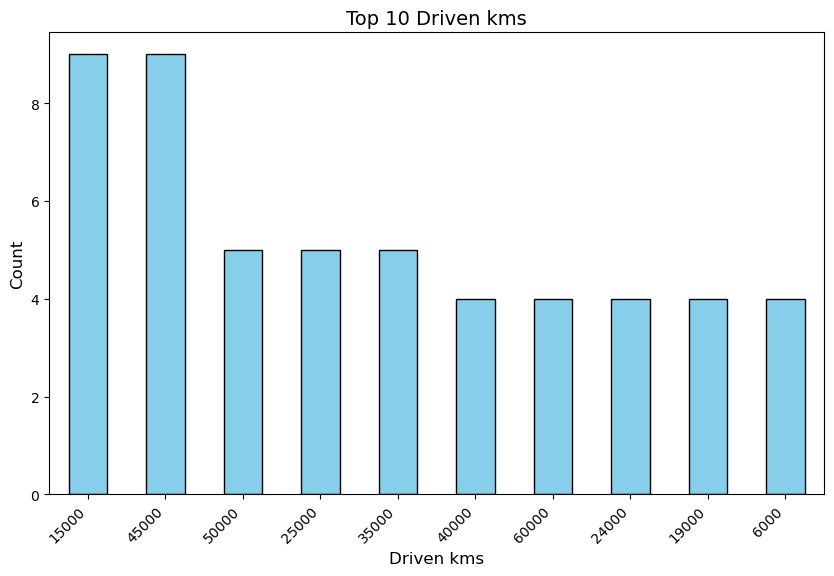

In [37]:
Driven_kms_counts = df["Driven_kms"].value_counts().head(10)

plt.figure(figsize=(10,6))
Driven_kms_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 Driven kms", fontsize=14)
plt.xlabel("Driven kms", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

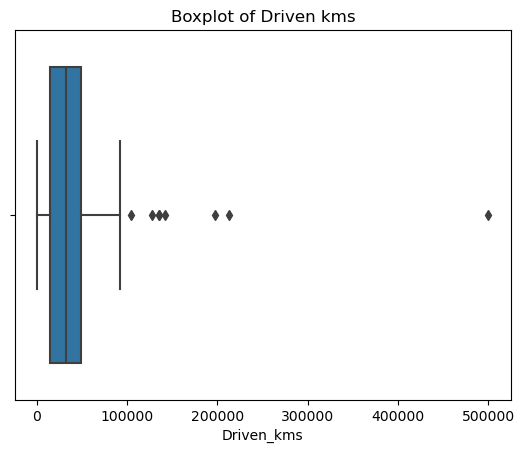

In [38]:
sns.boxplot(x=df['Driven_kms'])
plt.title("Boxplot of Driven kms")
plt.show()

In [39]:
Q1 = df['Driven_kms'].quantile(0.25)
Q3 = df['Driven_kms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Driven_kms'] >= lower_bound) &
 (df['Driven_kms'] <= upper_bound)]

In [40]:
df['Driven_kms'] = df['Driven_kms'].clip(lower=lower_bound,
                                              upper=upper_bound)

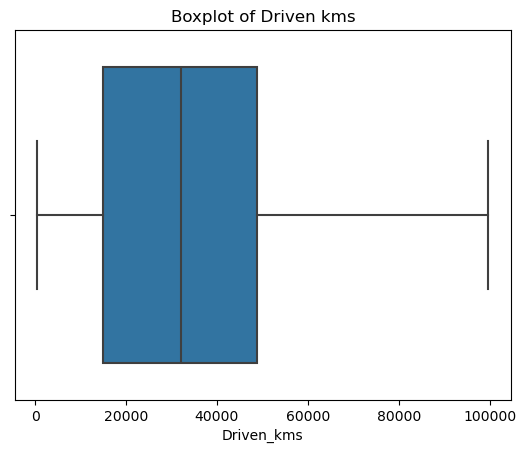

In [41]:
sns.boxplot(x=df['Driven_kms'])
plt.title("Boxplot of Driven kms")
plt.show()

Cleaning and Visualizing Fuel Type Column

In [42]:
df['Fuel_Type']

0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
296    Diesel
297    Petrol
298    Petrol
299    Diesel
300    Petrol
Name: Fuel_Type, Length: 299, dtype: object

In [43]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

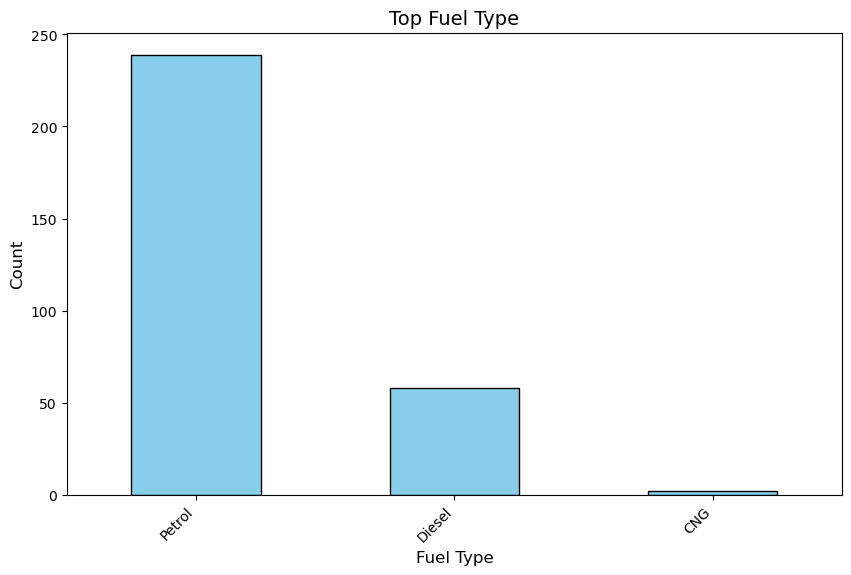

In [44]:
Fuel_Type_counts = df["Fuel_Type"].value_counts().head()

plt.figure(figsize=(10,6))
Fuel_Type_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top Fuel Type", fontsize=14)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Cleaning and Visualizing Selling type Column

In [45]:
df['Selling_type']

0      Dealer
1      Dealer
2      Dealer
3      Dealer
4      Dealer
        ...  
296    Dealer
297    Dealer
298    Dealer
299    Dealer
300    Dealer
Name: Selling_type, Length: 299, dtype: object

In [46]:
df['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

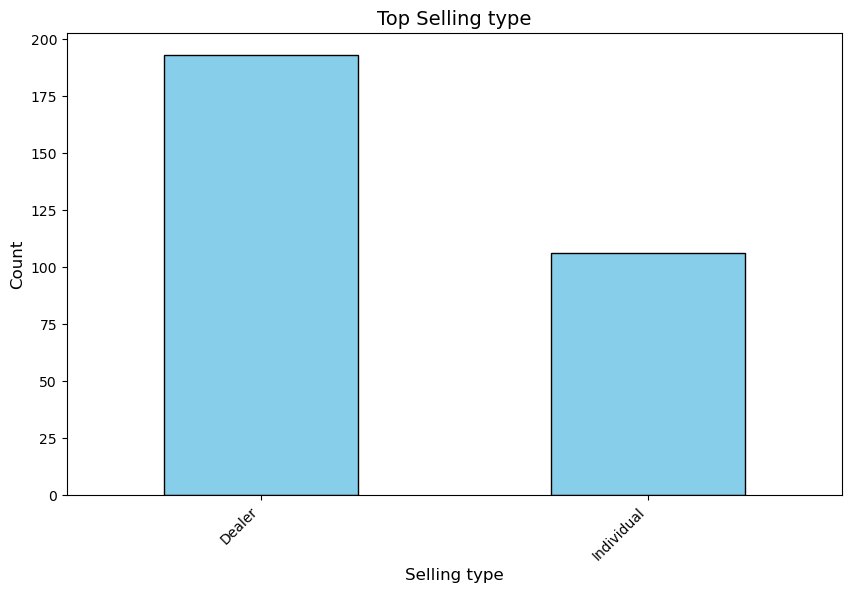

In [47]:
Selling_type_counts = df["Selling_type"].value_counts().head()

plt.figure(figsize=(10,6))
Selling_type_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top Selling type", fontsize=14)
plt.xlabel("Selling type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

Cleaning and Visualizing Transmission Column

In [48]:
df['Transmission']

0      Manual
1      Manual
2      Manual
3      Manual
4      Manual
        ...  
296    Manual
297    Manual
298    Manual
299    Manual
300    Manual
Name: Transmission, Length: 299, dtype: object

In [49]:
df['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

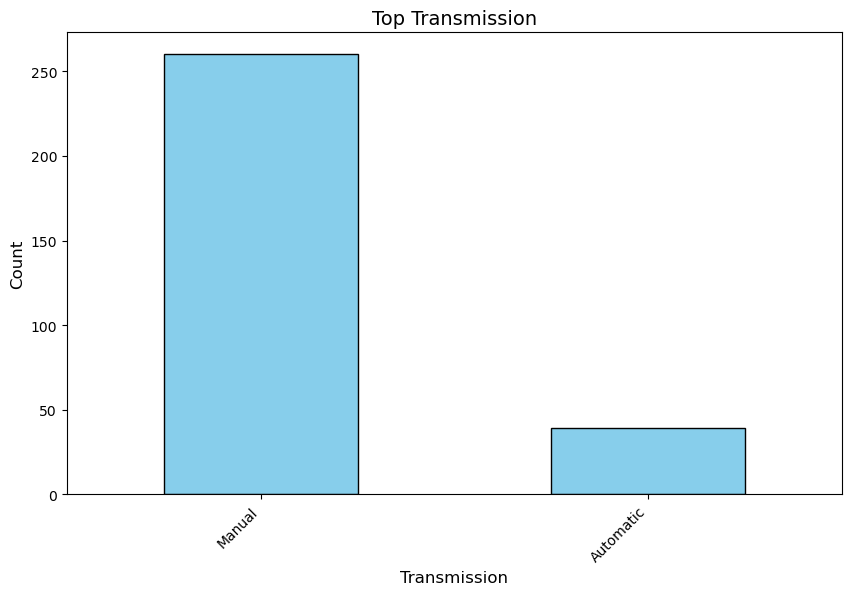

In [50]:
Transmission_counts = df["Transmission"].value_counts().head()

plt.figure(figsize=(10,6))
Transmission_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top Transmission", fontsize=14)
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

EDA and Feature Engineering

In [51]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual


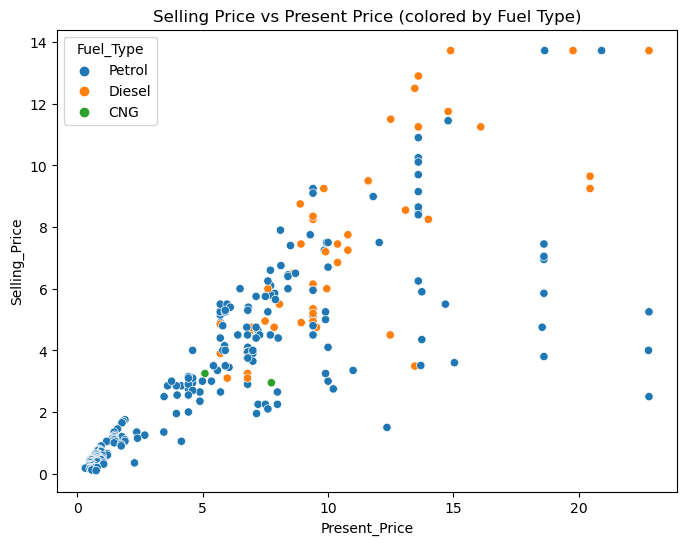

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title('Selling Price vs Present Price (colored by Fuel Type)')
plt.show()

c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


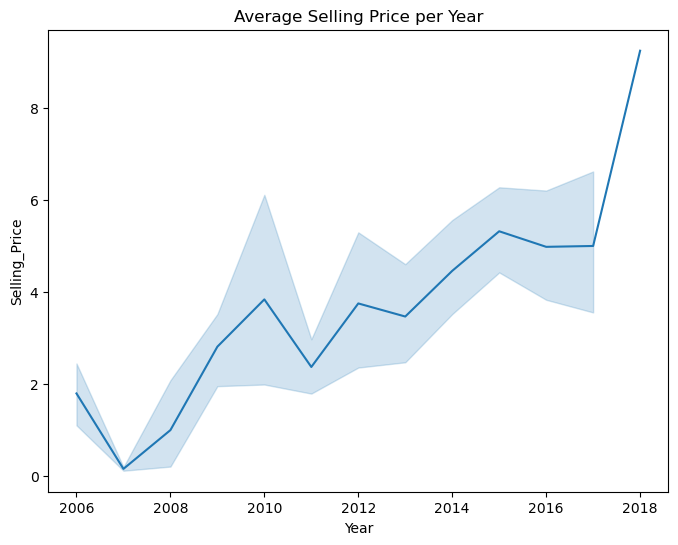

In [53]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='Selling_Price', data=df, estimator='mean')
plt.title('Average Selling Price per Year')
plt.show()

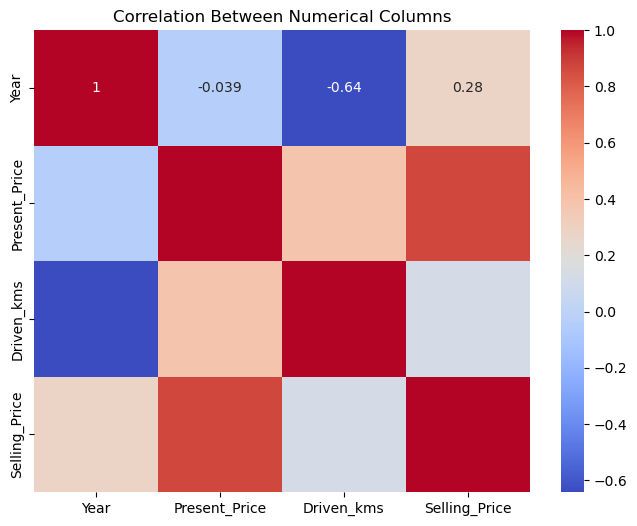

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Year','Present_Price','Driven_kms','Selling_Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Columns')
plt.show()

Bulding the Model

In [55]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Fuel_Type'] = le.fit_transform(X['Fuel_Type'])
X['Selling_type'] = le.fit_transform(X['Selling_type'])
X['Transmission'] = le.fit_transform(X['Transmission'])
X['Car_Name'] = le.fit_transform(X['Car_Name'])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=500,        
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Results:")
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Random Forest Results:
R² Score: 0.6826363408497087
MAE: 0.9477750750513398
RMSE: 2.0793446015621657


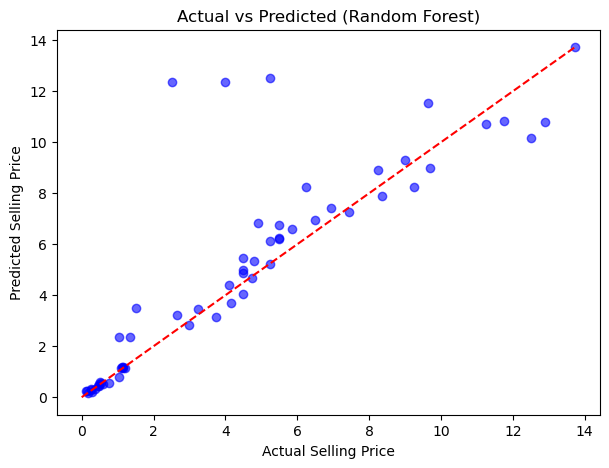

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted (Random Forest)")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()

**Summary:**

First, I started by exploring the dataset using descriptive statistics to understand its structure, feature types, and overall characteristics.

Second, I handled missing values, duplicates, and outliers to ensure the data was clean and reliable.

Third, I performed exploratory data analysis (EDA) by visualizing relationships between variables such as *Year*, *Present_Price*, *Driven_kms*, and *Selling_Price*.

Then, I encoded categorical features like *Fuel_Type*, *Selling_type*, and *Transmission* to make the data suitable for modeling.

Finally, I built regression models, to predict the *Selling_Price* of cars, achieving good accuracy and performance.
